In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import math
%matplotlib inline
from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram

1-to-1 関数と2-to-1 関数のoracleの定義

In [2]:
def one_to_one_oracle(qc, s, n):
    for i in range(n):
        if np.random.rand() > 0.5:
            qc.x(i)
    for i in range(n):
        qc.cx(i, i+1)

def two_to_one_oracle(qc, s, n):
    flag = 0
    for i, si in enumerate(reversed(s)):
        qc.cx(i, i+n)
        if si == '1' and flag == 0:
            qc.x(i)
            for j, sj in enumerate(reversed(s)):
                if sj == '1':
                    qc.cx(1, j+n)
            qc.x(i)
            flag = 1

アルゴリズムの本体となる量子回路の作成

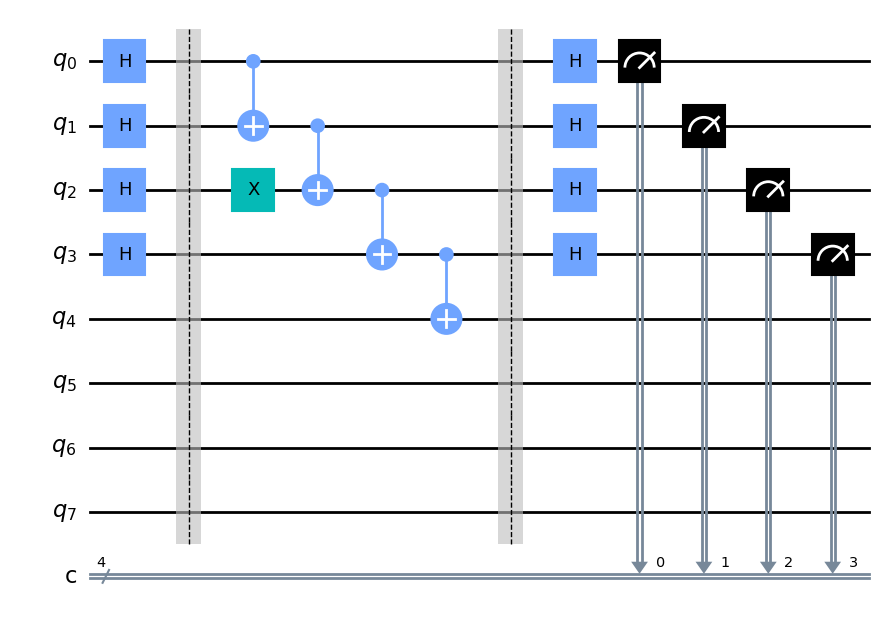

In [8]:
n = 4
N = np.random.randint(1, 2**n-1)
s = bin(N)[2:].zfill(n)

qc = QuantumCircuit(n*2, n)

for i in range(n):
    qc.h(i)

qc.barrier()

if np.random.rand() > 0.5:
    two_to_one_oracle(qc, s, n)
    selected = 'two_to_one'
else:
    one_to_one_oracle(qc, s, n)
    selected = 'one_to_one'

qc.barrier()

for i in range(n):
    qc.h(i)

for i in range(n):
    qc.measure(i, i)

qc.draw(output='mpl')

実行

one_to_one
1110


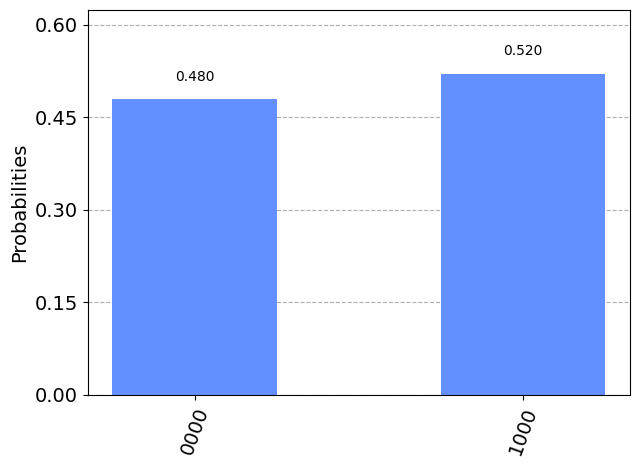

In [9]:
backend = Aer.get_backend('qasm_simulator')
shots = 1042
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

print(selected)
print(s)
plot_histogram(answer)